## Logistic Regression

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.io import loadmat
# some settings

import matplotlib as mpl
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('res/ex2data1.txt', header= None, names = ['ExamScore1','ExamScore2','Admitted'])

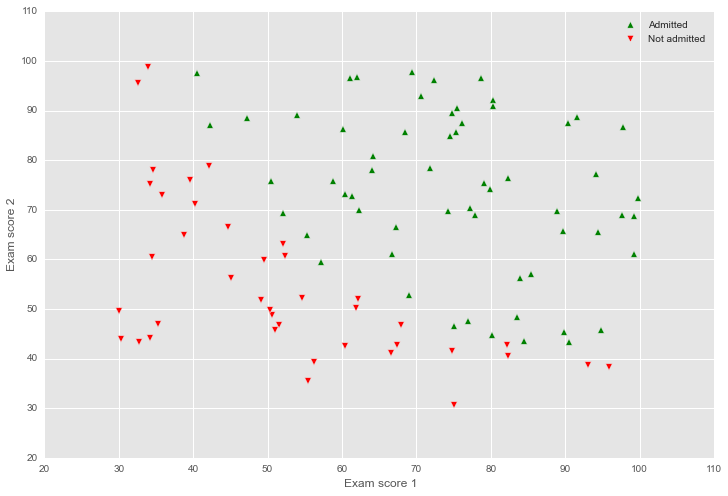

In [6]:
pos = data.Admitted == 1
neg = data.Admitted == 0
plt.scatter(data.ExamScore1[pos], data.ExamScore2[pos], s= 45, c= 'g',marker='^',label= 'Admitted')
plt.scatter(data.ExamScore1[neg], data.ExamScore2[neg], s= 45, c= 'r',marker='v',label='Not admitted')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')

## Logistic regression 

#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [7]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [8]:
def cost_function(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = -1*(np.log(h).T.dot(y)+ np.log(1-h).T.dot(1-y))/m
    return J[0]

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$


In [9]:
def gradientLog(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta_in.reshape(-1,1)))
    grad =1/(m)*X.T.dot(h-y)
    return(grad.flatten())

In [10]:
# append bias terms
X = np.c_[np.ones(data.shape[0]),data.ExamScore1.values, data.ExamScore2.values]
y = np.c_[data.Admitted.values]

In [11]:
theta_in = np.zeros((X.shape[1],1))
cost = cost_function(theta_in,X,y)
grad = gradientLog(theta_in, X,y)

In [12]:
print cost

[ 0.69314718]


### Optimization

[scipy-optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html)

In [13]:
def optimizeTheta(theta_in,X,y):
    result = sp.optimize.fmin(cost_function, theta_in, (X,y))
    return result

In [14]:
result = optimizeTheta(theta_in,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [15]:
print result

[-25.16130062   0.20623142   0.20147143]


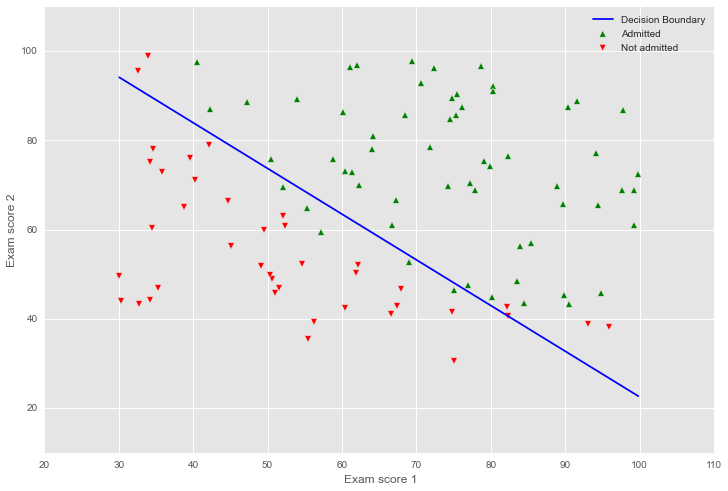

In [16]:
yy = result[0]* X[:,0] + result[1]* X[:,1] + result[2] * X[:,2]
pos = data.Admitted == 1
neg = data.Admitted == 0
plt.scatter(data.ExamScore1[pos], data.ExamScore2[pos], s= 45, c= 'g',marker='^',label= 'Admitted')
plt.scatter(data.ExamScore1[neg], data.ExamScore2[neg], s= 45, c= 'r',marker='v',label='Not admitted')
boundary_xs = np.array([np.min(X[:,1]), np.max(X[:,1])])
boundary_ys = (-1./result[2])*(result[0] + result[1]*boundary_xs)
plt.plot(boundary_xs,boundary_ys,'b-',label='Decision Boundary')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')

## Regularized Logistic regression

$$ 
\begin{align*}
J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2
\end{align*}
$$


$$ 
\begin{align*}
& \text{Repeat}\ \lbrace \newline
& \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline
& \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline
& \rbrace
\end{align*}
$$


A small modification leads to..
$$
\theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

You don't typically have to write the gradient, scipy will do that automatically for you.

In [113]:
# define regularization
reg = 0.3

In [114]:
def cost_function_reg(theta, X, y, reg = reg):
    m = y.size
    h = sigmoid(X.dot(theta))
    J = (-1*(np.log(h).T.dot(y)+ np.log(1-h).T.dot(1-y))/m) + (reg * theta.T.dot(theta))/(2*m) 
    return J[0]

In [115]:
def optimizeThetaReg(theta_in,X,y):
    result = sp.optimize.fmin(cost_function_reg, theta_in, (X,y))
    return result

In [116]:
optimizeThetaReg(theta_in,X,y)

Optimization terminated successfully.
         Current function value: 0.399722
         Iterations: 146
         Function evaluations: 266


array([-7.27605971,  0.06415264,  0.05761161])

## Visualization

In [124]:
data = pd.read_csv('res/ex2data2.txt', header= None, names = ['Test1','Test2','result'])

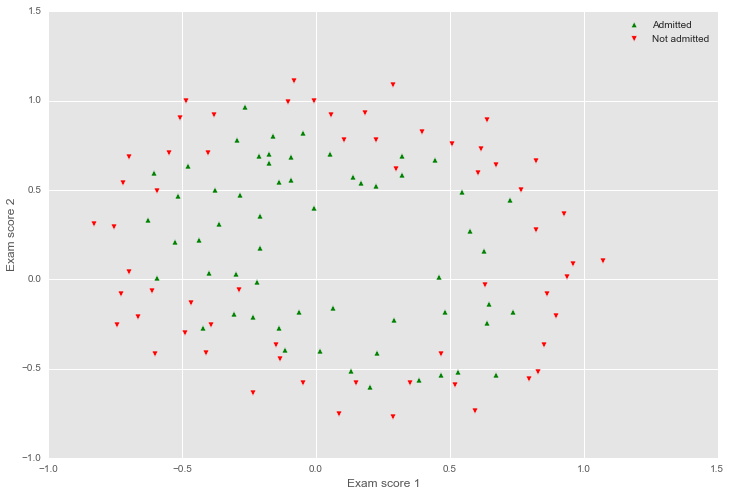

In [131]:
pos = data.result == 1
neg = data.result == 0
plt.scatter(data.Test1[pos], data.Test2[pos], s= 35, c= 'g',marker='^',label= 'Admitted')
plt.scatter(data.Test1[neg], data.Test2[neg], s= 35, c= 'r',marker='v',label='Not admitted')
plt.legend()
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')